# Machine Learning Models Interpretation

In [54]:
import numpy as np
import pandas as pd
import pickle
from sklearn.inspection import plot_partial_dependence
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import subsets

In [13]:
train_df = pd.read_csv('Data/train.csv', delimiter=',')
train_val_df = pd.read_csv('Data/train_val.csv', delimiter=',')

### Load models

In [14]:
def load_model(model_name):
    filename = f"models/{model_name}.pickle"
    with open(filename, 'rb') as f:
        loaded_model = pickle.load(f)
        return loaded_model

### Partial plots

In [50]:
def partial_plot_for_graduate(model):
    for feature in best_ranked_features:
        fig, ax = plt.subplots(figsize=(4, 2))
        plot_partial_dependence(model, train_val_df, [feature], target='Graduate', ax=ax)
        plt.tight_layout()
        plt.show() 
        
def partial_plot_for_dropout(model):
    for feature in best_ranked_features:
        fig, ax = plt.subplots(figsize=(4, 2))
        plot_partial_dependence(model, train_val_df, [feature], target='Dropout', ax=ax)
        plt.tight_layout()
        plt.show()         

### Feature importance

In [59]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    feature_names = train_val_df.columns
    
    sorted_importance_index = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_importance_index]
    sorted_feature_names = feature_names[sorted_importance_index]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(range(len(importances)), sorted_importances)
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_feature_names, rotation=90)
    ax.set_title('Feature importances')
    plt.show()

In [15]:
best_ranked_features = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (without evaluations)', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 1st sem (enrolled)',
    'Admission grade', 
    'Application mode', 
    'Application order', 
    'Course',
    'Previous qualification (grade)', 
    'Tuition fees up to date'
]

## Naive Bayes

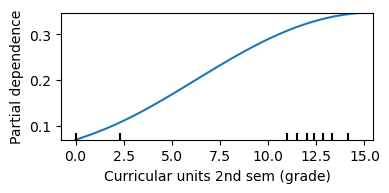

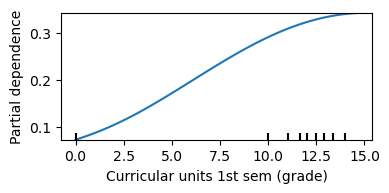

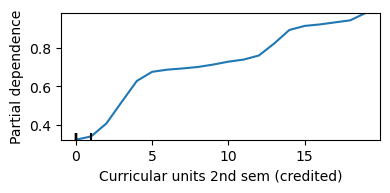

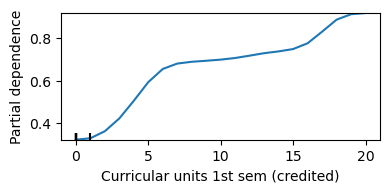

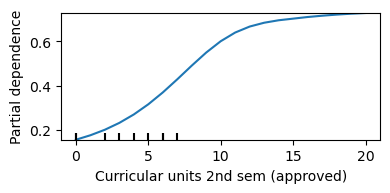

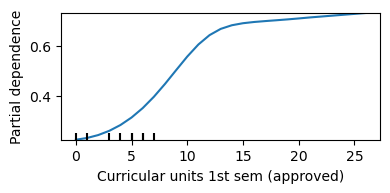

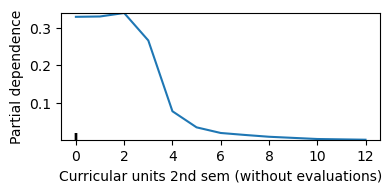

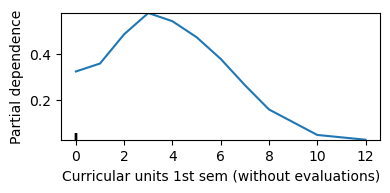

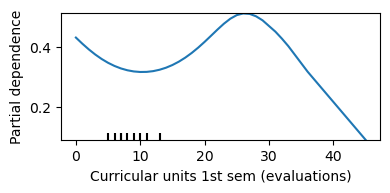

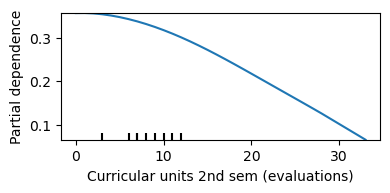

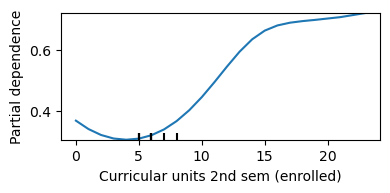

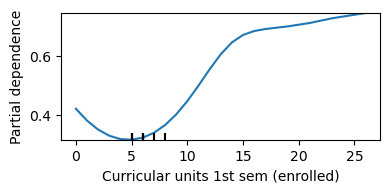

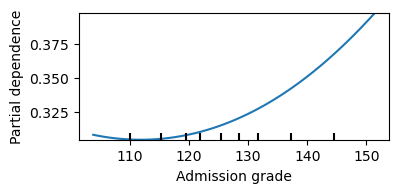

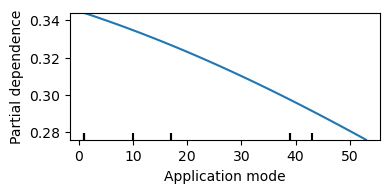

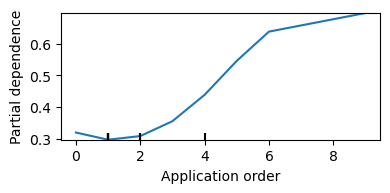

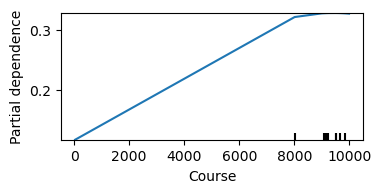

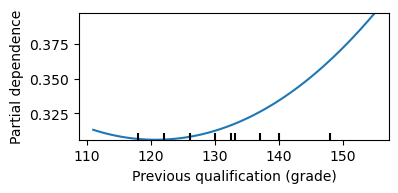

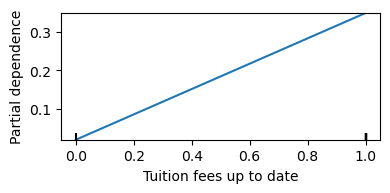

In [52]:
nb = load_model('nb')
partial_plot_for_graduate(nb)

## Logistic regression

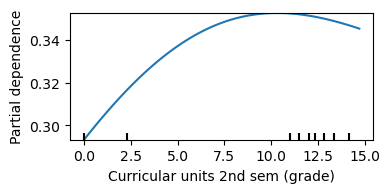

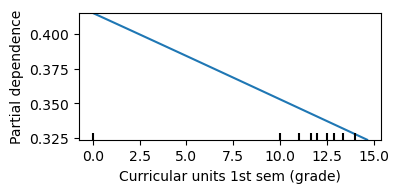

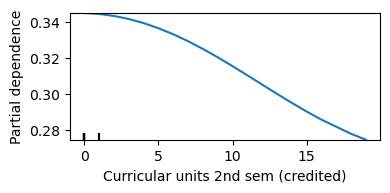

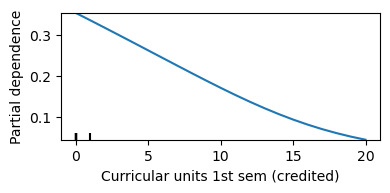

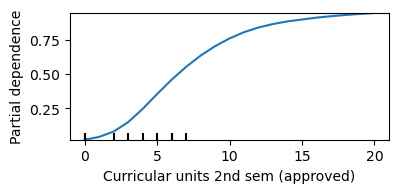

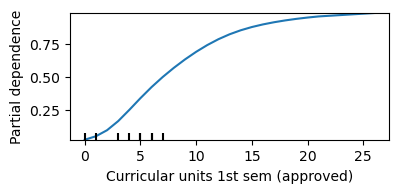

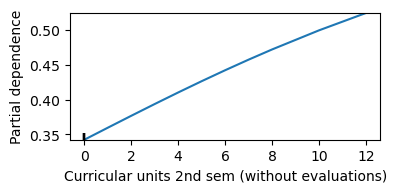

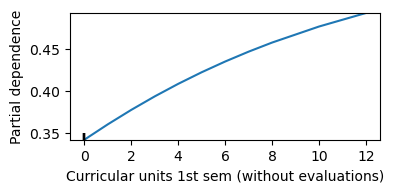

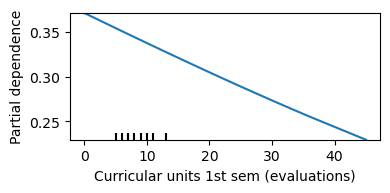

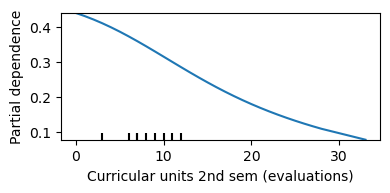

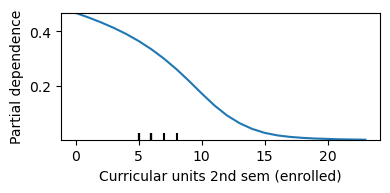

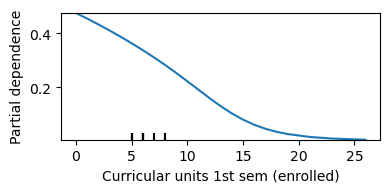

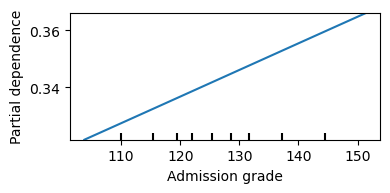

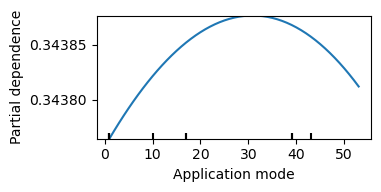

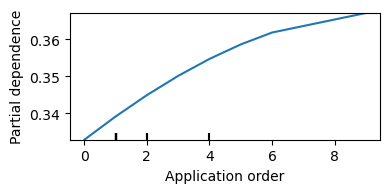

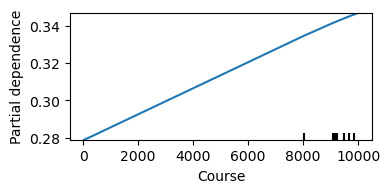

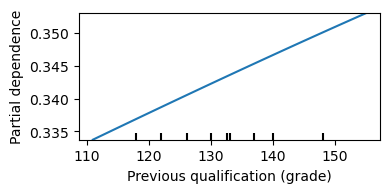

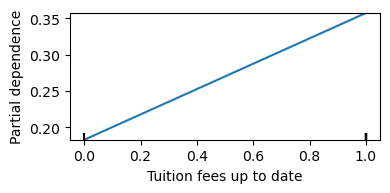

In [42]:
log_reg = load_model('log_reg')
partial_plot_for_graduate(log_reg)

## Decision tree

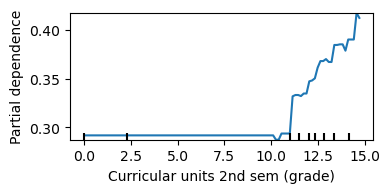

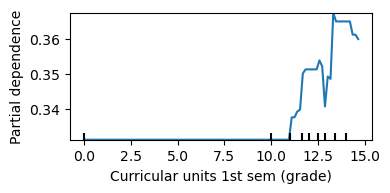

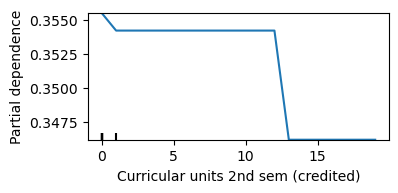

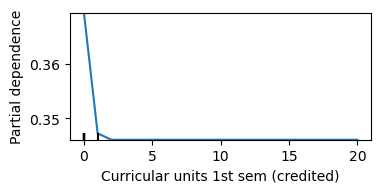

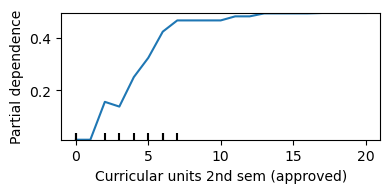

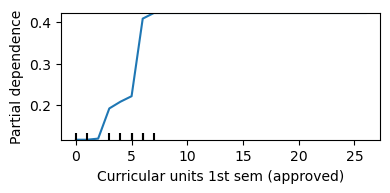

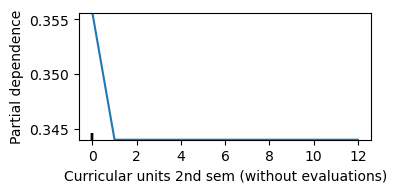

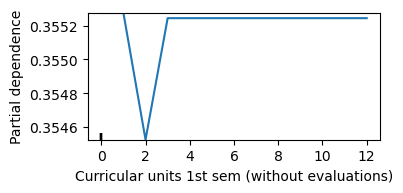

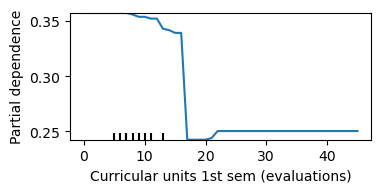

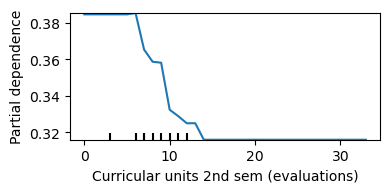

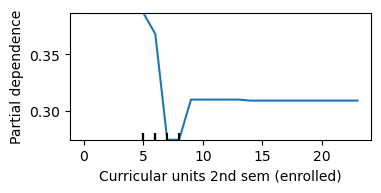

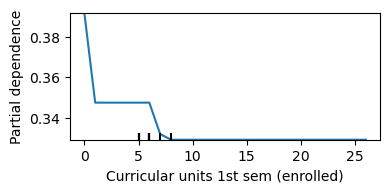

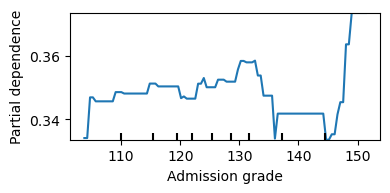

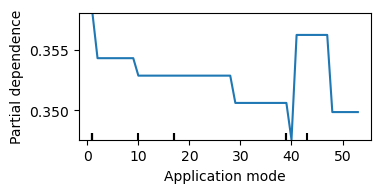

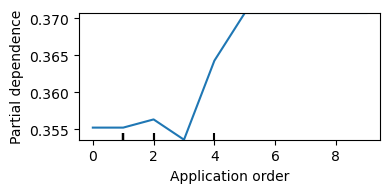

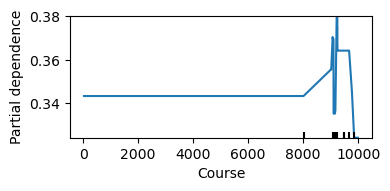

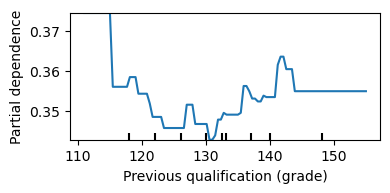

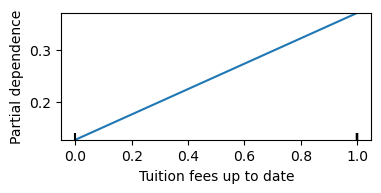

In [43]:
dt = load_model('dt')
partial_plot_for_graduate(dt)

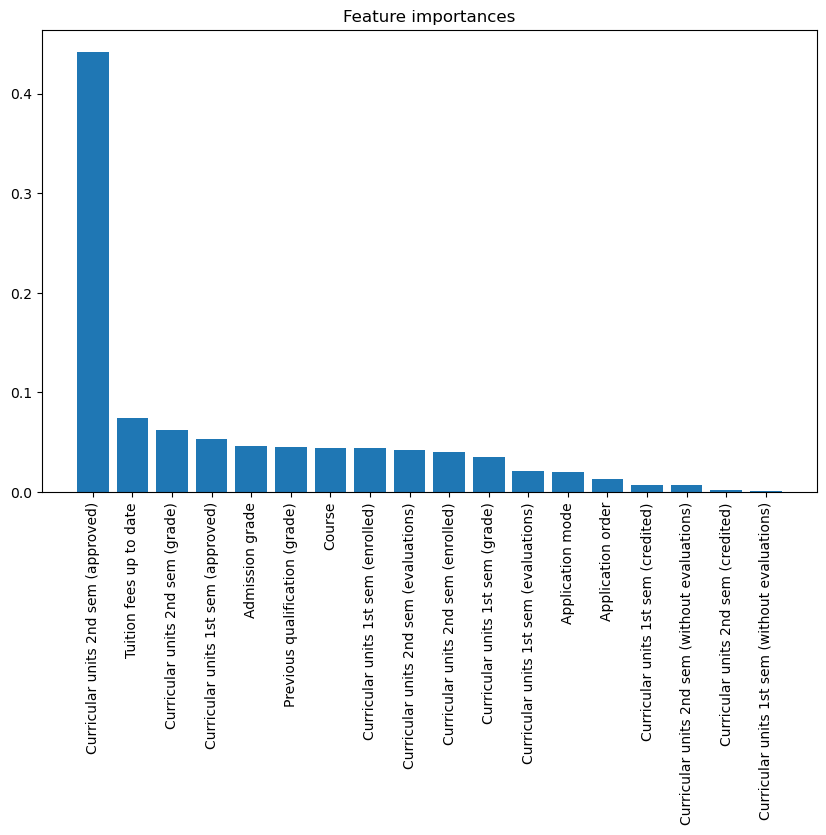

In [65]:
plot_feature_importance(dt)

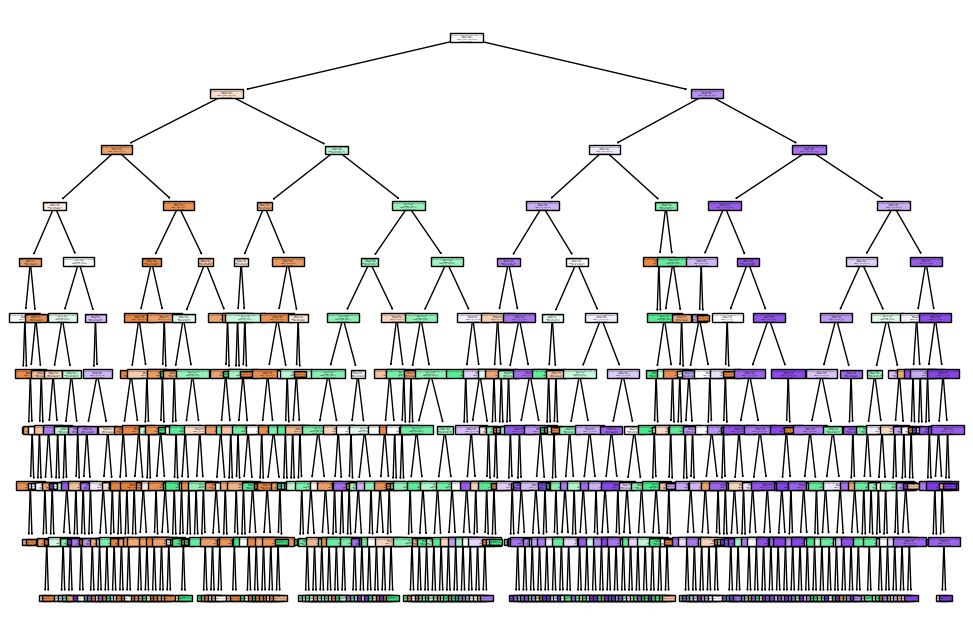

In [55]:
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=best_ranked_features, class_names=['Dropout', 'Enrolled', 'Graduate'], filled=True)
plt.show()

## Bagging

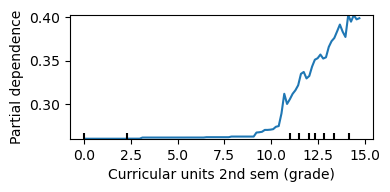

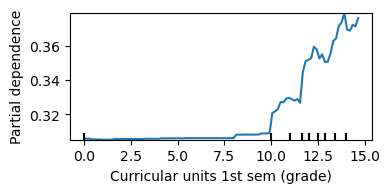

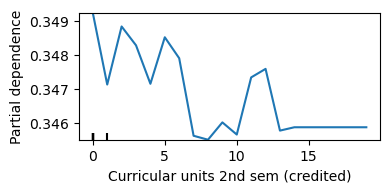

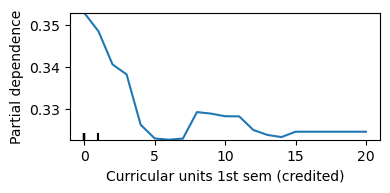

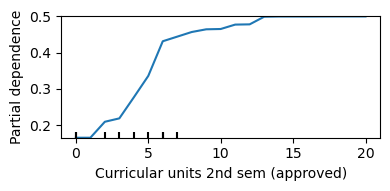

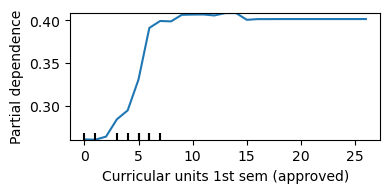

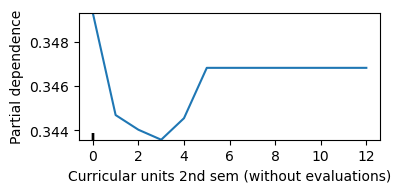

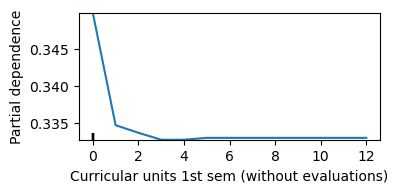

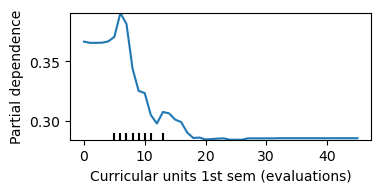

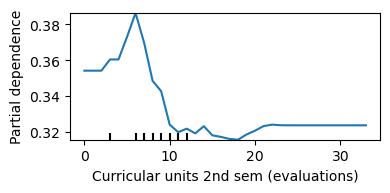

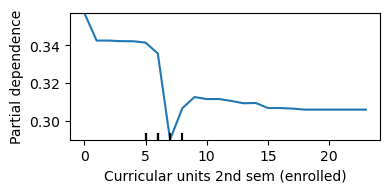

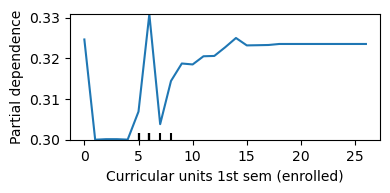

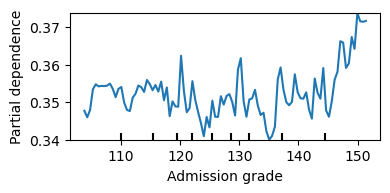

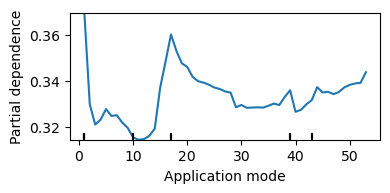

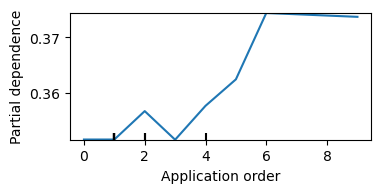

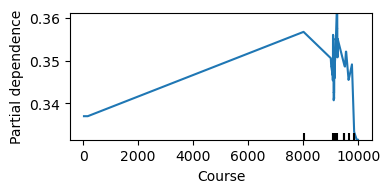

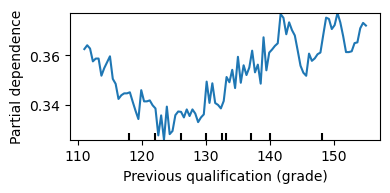

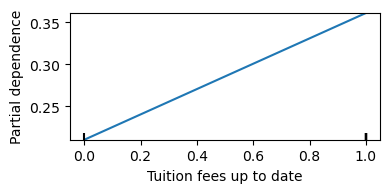

In [46]:
bagging = load_model('bagging')
partial_plot_for_graduate(bagging)

## Random Forest

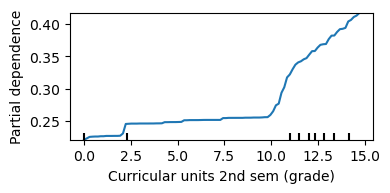

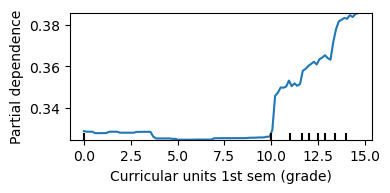

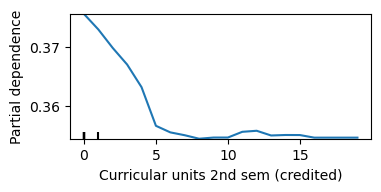

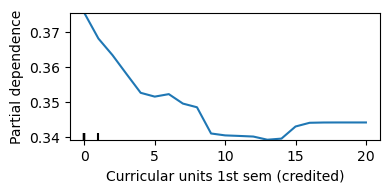

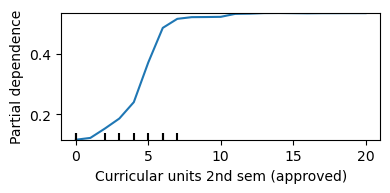

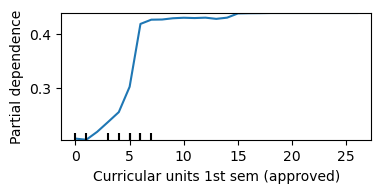

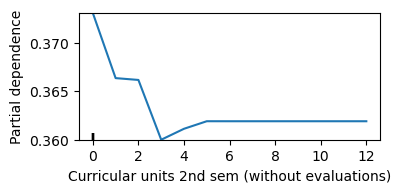

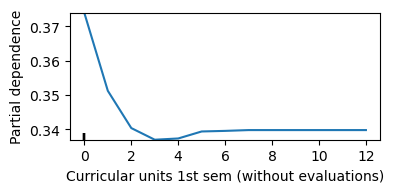

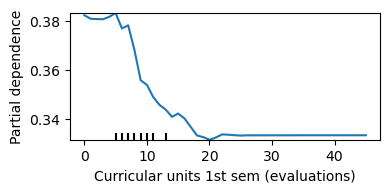

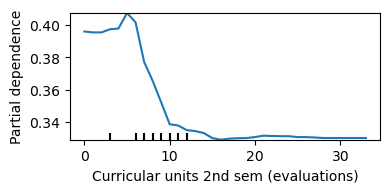

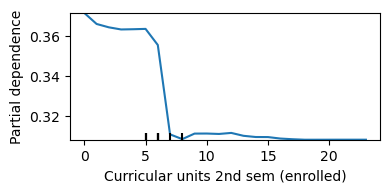

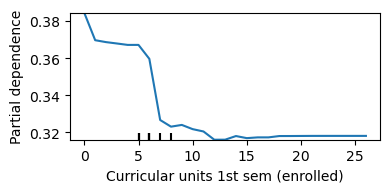

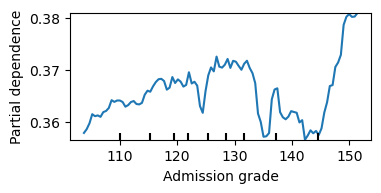

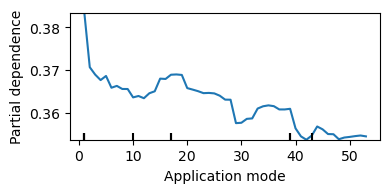

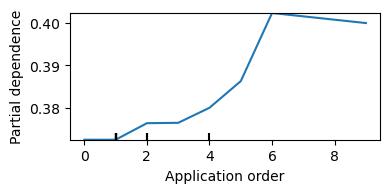

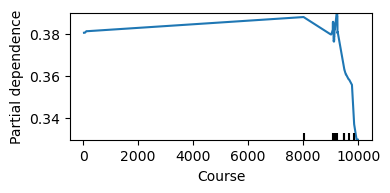

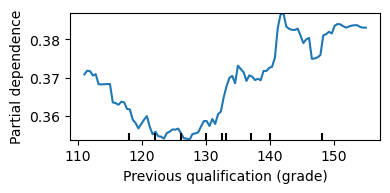

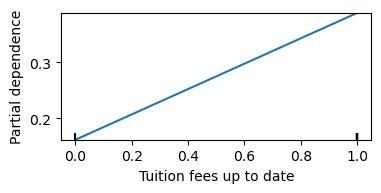

In [45]:
rf = load_model('rf')
partial_plot_for_graduate(rf)

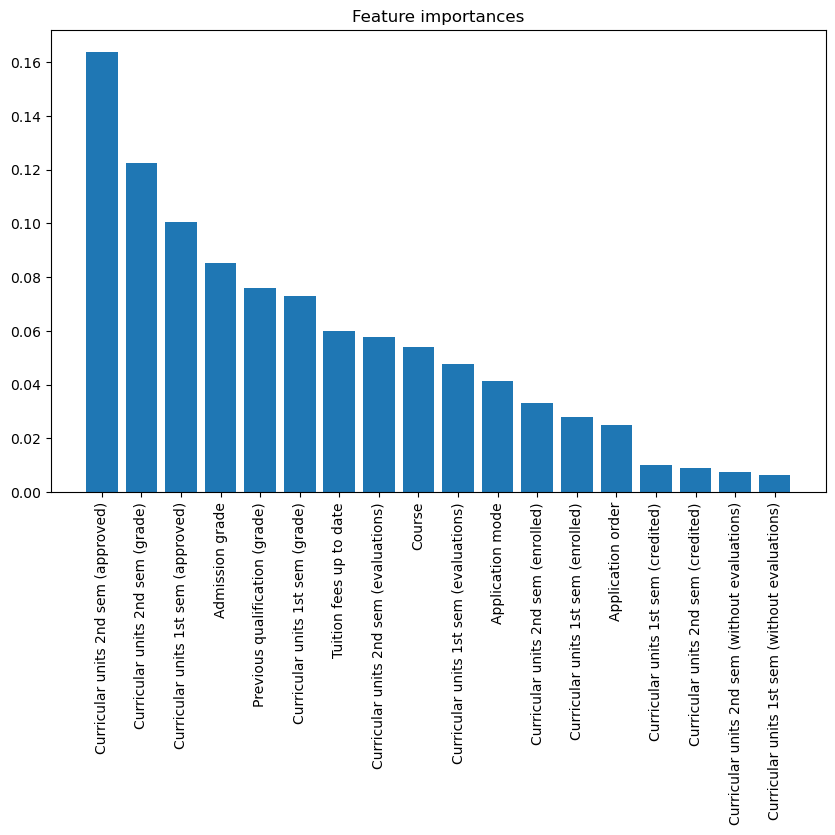

In [60]:
plot_feature_importance(rf)


## Ada Boost

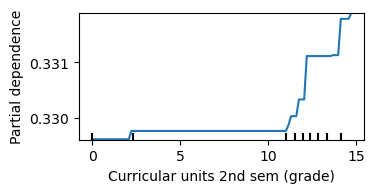

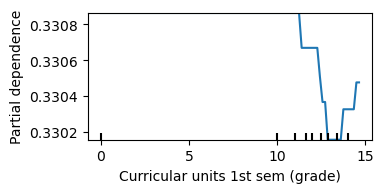

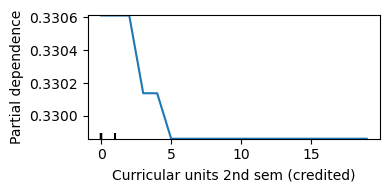

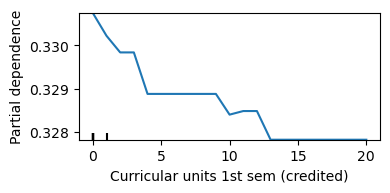

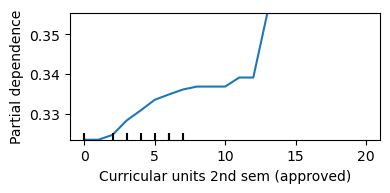

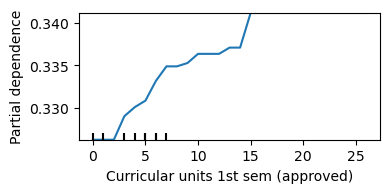

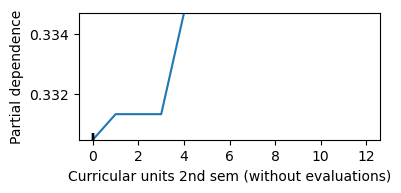

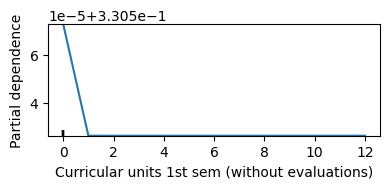

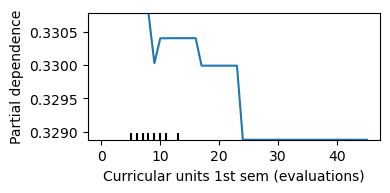

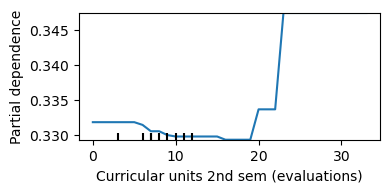

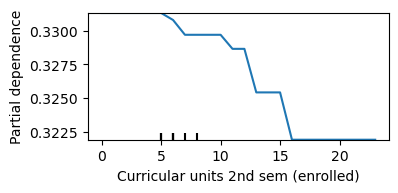

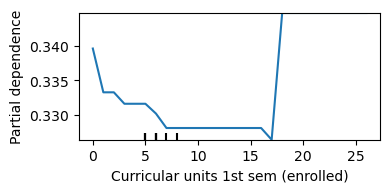

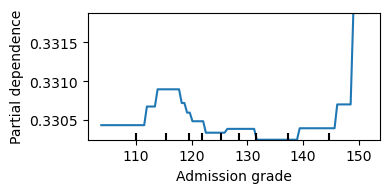

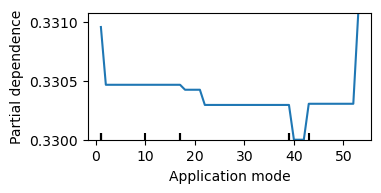

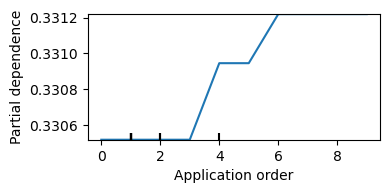

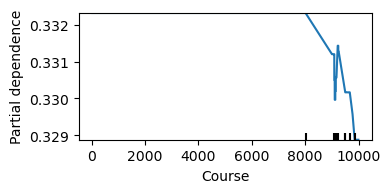

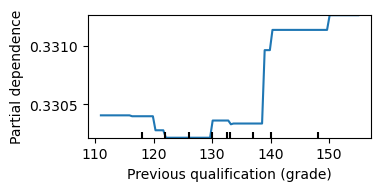

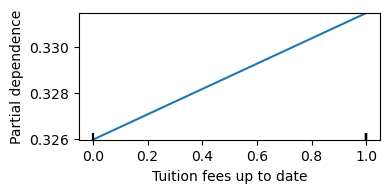

In [48]:
ada_boost = load_model('ada-boost')
partial_plot_for_graduate(ada_boost)

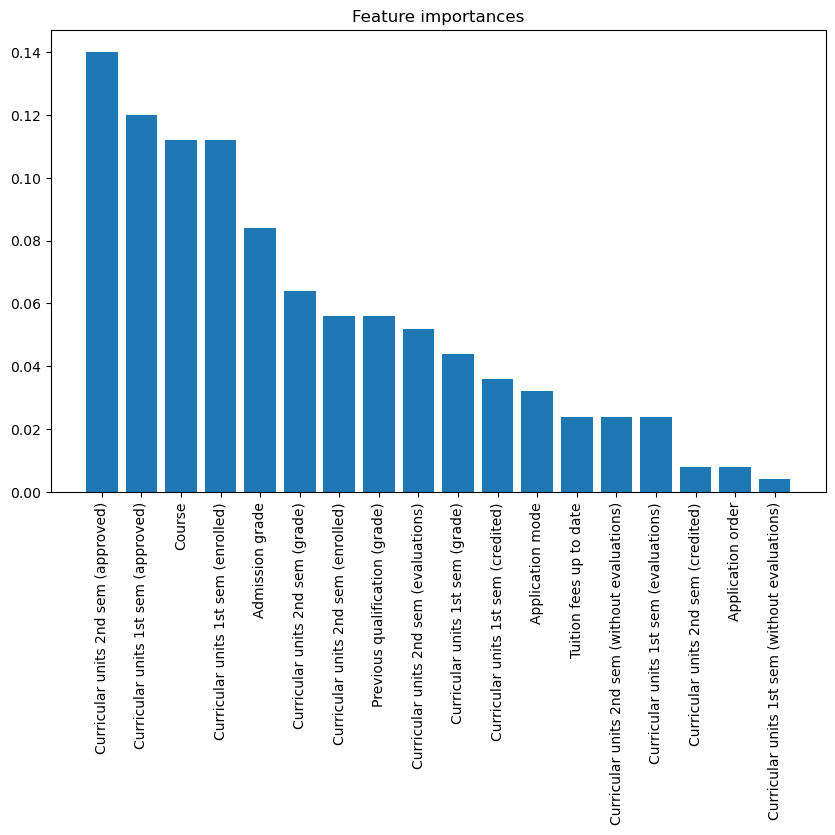

In [61]:
plot_feature_importance(ada_boost)

## Gradient Boosting

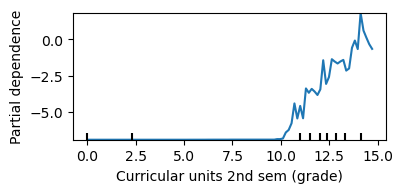

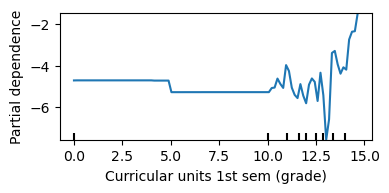

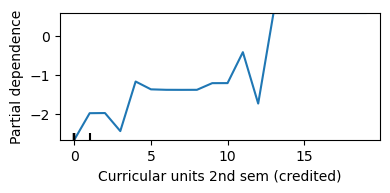

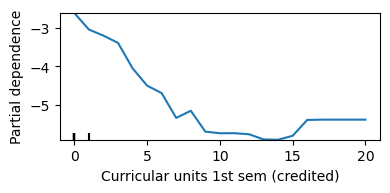

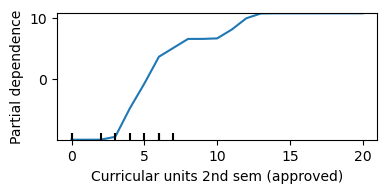

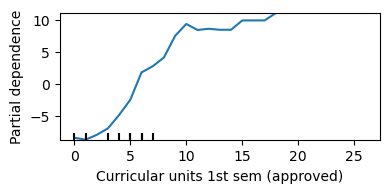

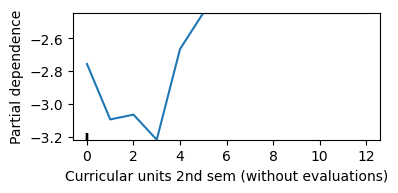

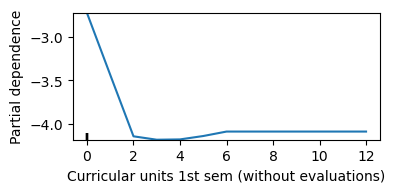

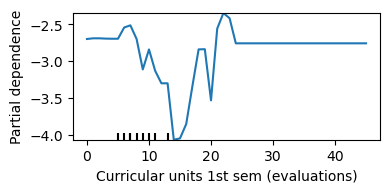

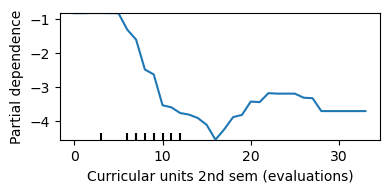

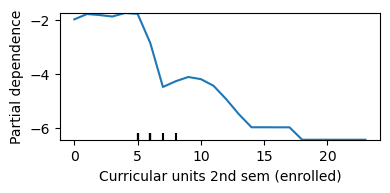

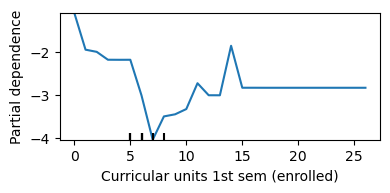

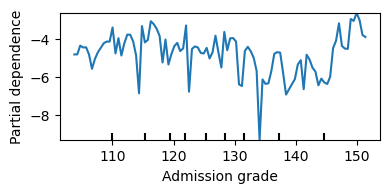

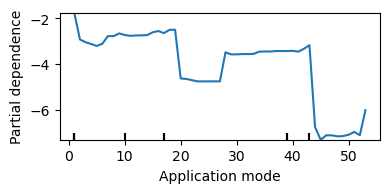

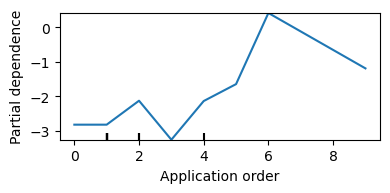

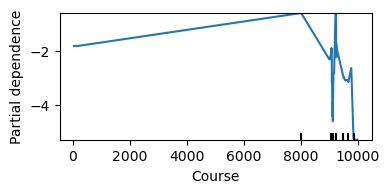

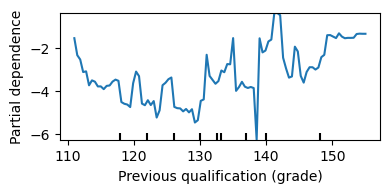

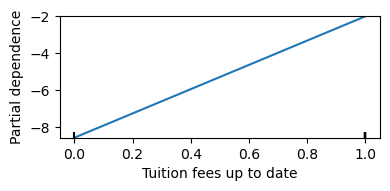

In [49]:
gradient_boosting = load_model('gradient-boosting')
partial_plot_for_graduate(gradient_boosting)

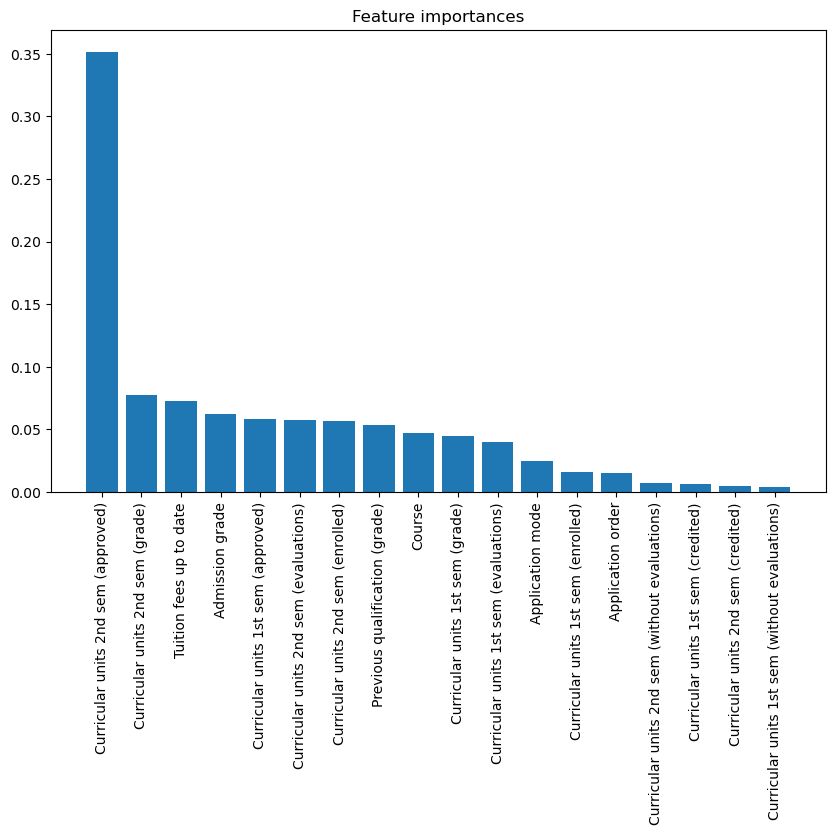

In [62]:
plot_feature_importance(gradient_boosting)